# **BIG MART SALES - EDA**

## Importing libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Ingestion

In [11]:
main_df=pd.read_csv("C:\\DS-Projects\\BigMartSales-ML\\Data\\trainData.csv")
df=main_df.copy()

In [12]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [14]:
print(f"Shape of the DataFrame: {df.shape}")

Shape of the DataFrame: (8523, 12)


In [15]:
print(f"Size or total data of the DataFrame: {df.size}")

Size or total data of the DataFrame: 102276


In [16]:
#basic info of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [19]:
#counting null values 
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [24]:
#Categorical & Numerical Data
categorical_data=df.select_dtypes(include=[object])
numerical_data=df.select_dtypes(include=[np.float64, np.int64])

In [25]:
categorical_data.head(3)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1


In [23]:
numerical_data.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700


In [37]:
numerical_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Data Cleaning

In [26]:
#Mean imputation
df['Item_Weight'].fillna(value=df["Item_Weight"].mean(), inplace=True)

C:\Users\Balashakthi\AppData\Local\Temp\ipykernel_14516\1260455843.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(value=df["Item_Weight"].mean(), inplace=True)


In [29]:
#finding mode of the outletSize column for each outlet type
mode_OutletSize=df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x:x.mode()[0]))
mode_OutletSize

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [33]:
#finding missing values in the outletSize column
missing_values=df['Outlet_Size'].isnull()

In [34]:
#imputing mode by locating missing values and applying it with lambda function
df.loc[missing_values, 'Outlet_Size']=df.loc[missing_values, 'Outlet_Type'].apply(lambda x:mode_OutletSize[x])

In [35]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### All missing values are filled with mean and mode imputation...

## Data Visualization & Analysis

In [99]:
#Setting the color palette for seaborn charts
palette = sns.color_palette("husl", n_colors=20) # Generates 8 colors from the 'husl' palette
sns.set_palette(palette)


C:\Users\Balashakthi\AppData\Local\Temp\ipykernel_14516\573264428.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Outlet_Size", data=categorical_data, palette=palette)
C:\Users\Balashakthi\AppData\Local\Temp\ipykernel_14516\573264428.py:3: UserWarning: The palette list has more values (20) than needed (3), which may not be intended.
  sns.countplot(x="Outlet_Size", data=categorical_data, palette=palette)


<Axes: xlabel='Outlet_Size', ylabel='count'>

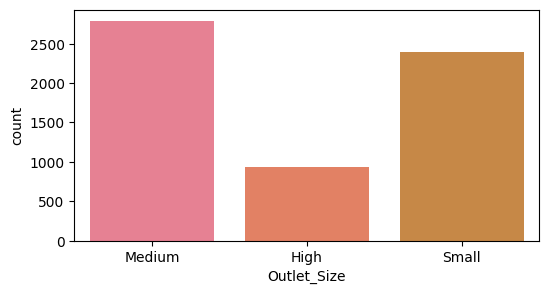

In [114]:
#Outlet Size
plt.figure(figsize=(6,3))
sns.countplot(x="Outlet_Size", data=categorical_data, palette=palette)

In [115]:
#From bar chart the sales of the oultet size shows the sale count is high in medium and small stores drastically than 
#the high outlet size stores

C:\Users\Balashakthi\AppData\Local\Temp\ipykernel_14516\860606047.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Item_Fat_Content", data=categorical_data, palette=palette)
C:\Users\Balashakthi\AppData\Local\Temp\ipykernel_14516\860606047.py:3: UserWarning: The palette list has more values (20) than needed (5), which may not be intended.
  sns.countplot(x="Item_Fat_Content", data=categorical_data, palette=palette)


<Axes: xlabel='Item_Fat_Content', ylabel='count'>

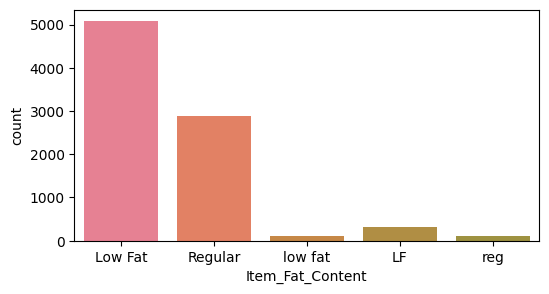

In [116]:
#Fat content 
plt.figure(figsize=(6,3))
sns.countplot(x="Item_Fat_Content", data=categorical_data, palette=palette)

In [117]:
#Preprocessing the Item Fat Content column since the categories are primarily been two but named differently
df.replace({"Item_Fat_Content":{"low fat":"Low Fat", "LF":"Low Fat", "reg":"Regular"}}, inplace=True)
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

C:\Users\Balashakthi\AppData\Local\Temp\ipykernel_14516\1633925494.py:2: UserWarning: The palette list has more values (20) than needed (10), which may not be intended.
  sns.countplot(x='Outlet_Identifier', data=categorical_data, palette=palette, hue='Outlet_Identifier')


<Axes: xlabel='Outlet_Identifier', ylabel='count'>

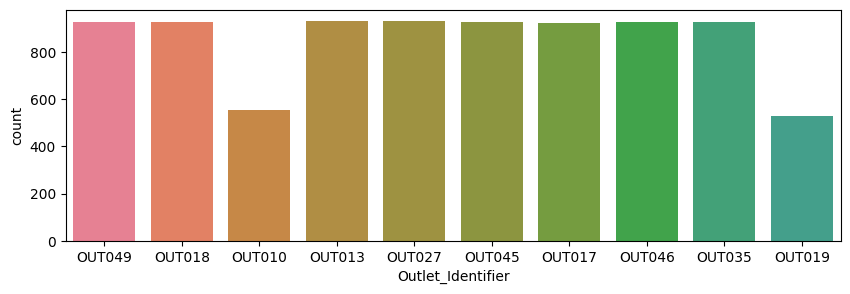

In [118]:
plt.figure(figsize=(10,3))
sns.countplot(x='Outlet_Identifier', data=categorical_data, palette=palette, hue='Outlet_Identifier')

C:\Users\Balashakthi\AppData\Local\Temp\ipykernel_14516\3347308600.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Item_Type', data=categorical_data, palette=palette)
C:\Users\Balashakthi\AppData\Local\Temp\ipykernel_14516\3347308600.py:2: UserWarning: The palette list has more values (20) than needed (16), which may not be intended.
  sns.countplot(y='Item_Type', data=categorical_data, palette=palette)


<Axes: xlabel='count', ylabel='Item_Type'>

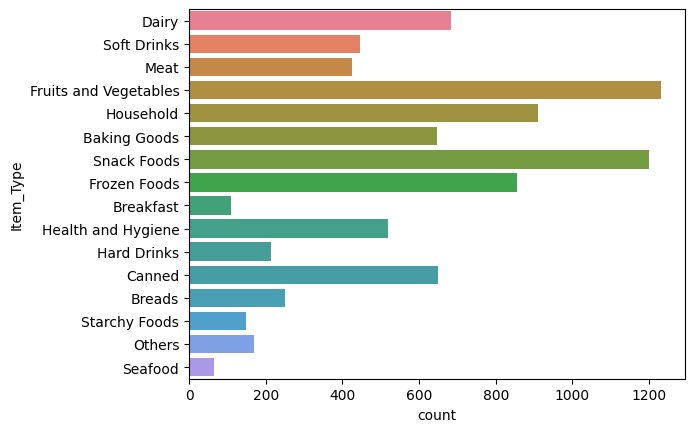

In [119]:
#Top available products
sns.countplot(y='Item_Type', data=categorical_data, palette=palette)

C:\Users\Balashakthi\AppData\Local\Temp\ipykernel_14516\4251196509.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Outlet_Type', data=categorical_data, ax=axes[0], palette=palette)
C:\Users\Balashakthi\AppData\Local\Temp\ipykernel_14516\4251196509.py:2: UserWarning: The palette list has more values (20) than needed (4), which may not be intended.
  sns.countplot(y='Outlet_Type', data=categorical_data, ax=axes[0], palette=palette)
C:\Users\Balashakthi\AppData\Local\Temp\ipykernel_14516\4251196509.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Outlet_Location_Type', data=categorical_data, ax=axes[1], palette=palette)
C:\Users\Balashakthi\AppData\Local\Temp\ipykernel_14516\

<Axes: xlabel='count', ylabel='Outlet_Location_Type'>

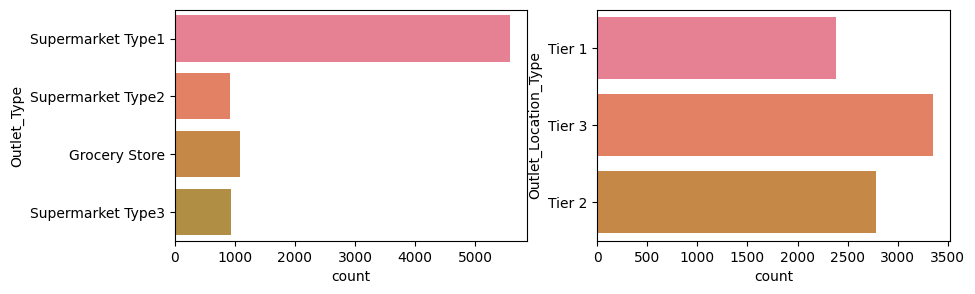

In [121]:
fig, axes=plt.subplots(1,2, figsize=(10,3))
sns.countplot(y='Outlet_Type', data=categorical_data, ax=axes[0], palette=palette)
sns.countplot(y='Outlet_Location_Type', data=categorical_data, ax=axes[1], palette=palette)

In [ ]:
###Exploration on numerical data

In [131]:
numerical_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


C:\Users\Balashakthi\AppData\Local\Temp\ipykernel_14516\1090673261.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Weight'])


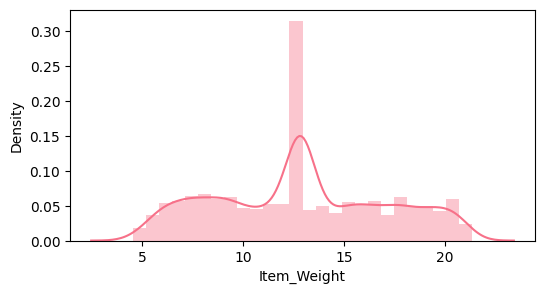

In [122]:
#Item weight distribution
plt.figure(figsize=(6,3))
sns.distplot(df['Item_Weight'])
plt.show()

C:\Users\Balashakthi\AppData\Local\Temp\ipykernel_14516\2963567358.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Visibility'])


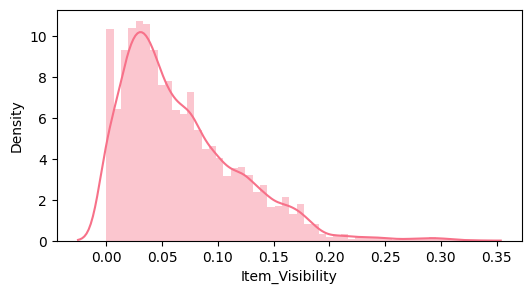

In [126]:
#Item visibility distribution
plt.figure(figsize=(6,3))
sns.distplot(df['Item_Visibility'])
plt.show()

C:\Users\Balashakthi\AppData\Local\Temp\ipykernel_14516\1975531177.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_MRP'])


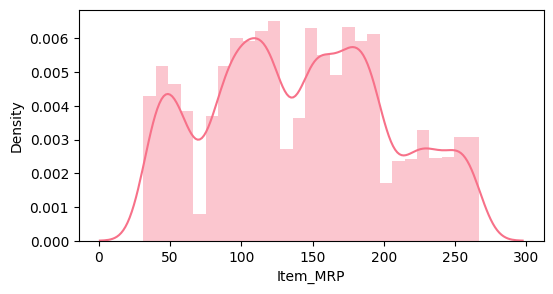

In [127]:
#Item MRP distribution
plt.figure(figsize=(6,3))
sns.distplot(df['Item_MRP'])
plt.show()

C:\Users\Balashakthi\AppData\Local\Temp\ipykernel_14516\3985427354.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outlet_Establishment_Year', data=numerical_data, palette=palette)
C:\Users\Balashakthi\AppData\Local\Temp\ipykernel_14516\3985427354.py:3: UserWarning: The palette list has more values (20) than needed (9), which may not be intended.
  sns.countplot(x='Outlet_Establishment_Year', data=numerical_data, palette=palette)


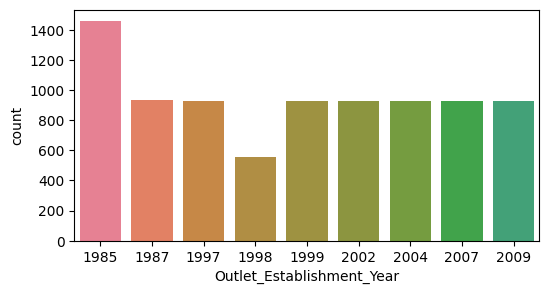

In [128]:
#Outlet establishment year distribution
plt.figure(figsize=(6,3))
sns.countplot(x='Outlet_Establishment_Year', data=numerical_data, palette=palette)
plt.show()

C:\Users\Balashakthi\AppData\Local\Temp\ipykernel_14516\1524854795.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'])


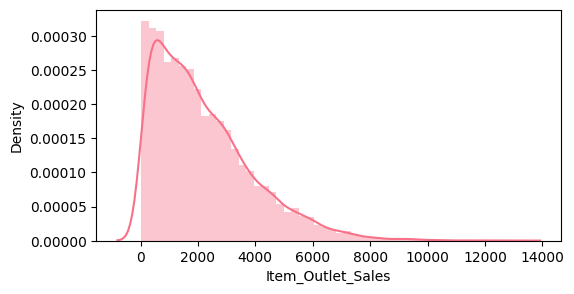

In [129]:
#Outlet sales distribution
plt.figure(figsize=(6,3))
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

### Bivariate Analysis

In [132]:
##Individual data against target data


C:\Users\Balashakthi\AppData\Local\Temp\ipykernel_14516\823227969.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item_Outlet_Sales', y='Item_Type', data=df, palette=palette)
C:\Users\Balashakthi\AppData\Local\Temp\ipykernel_14516\823227969.py:3: UserWarning: The palette list has more values (20) than needed (16), which may not be intended.
  sns.barplot(x='Item_Outlet_Sales', y='Item_Type', data=df, palette=palette)


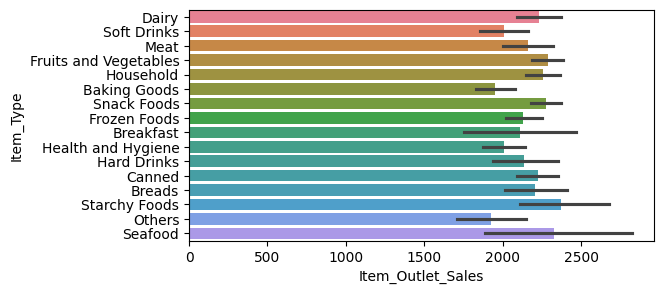

In [133]:
#Item type against Outlet sales 
plt.figure(figsize=(6,3))
sns.barplot(x='Item_Outlet_Sales', y='Item_Type', data=df, palette=palette)
plt.show()

In [ ]:
###The high contribution to sales comes from seafoods and starchy foods instead of top available products like 
###fruits and vegetables

C:\Users\Balashakthi\AppData\Local\Temp\ipykernel_14516\2907807772.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df, palette=palette)
C:\Users\Balashakthi\AppData\Local\Temp\ipykernel_14516\2907807772.py:3: UserWarning: The palette list has more values (20) than needed (3), which may not be intended.
  sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df, palette=palette)


<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

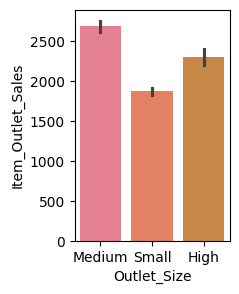

In [141]:
#Different outlet size vs outlet sales
plt.figure(figsize=(2,3))
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df, palette=palette)

In [ ]:
###Thought the sale count is high in small and medium than high size outlet, high sized outlet contribute high value sale
###tha small size outlet , but the medium still tops oulet sale count and outlet sale value

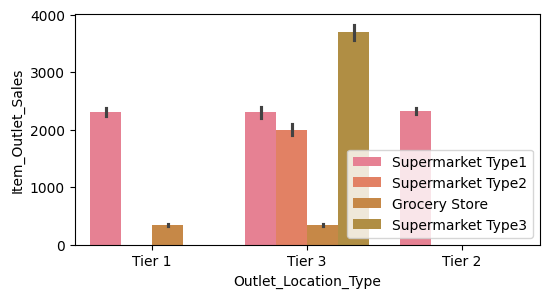

In [153]:
plt.figure(figsize=(6,3))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Type', data=df)
plt.legend()

In [ ]:
### Tier 3 locations outlet type contribute more towards outlet sales
###

Text(0.5, 1.0, 'Correlation between Columns')

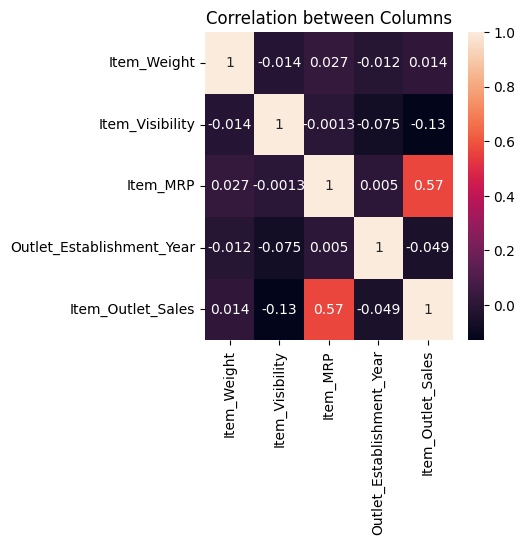

In [159]:
#Correlation
plt.figure(figsize=(4,4))
sns.heatmap(numerical_data.corr(), annot=True)
plt.title("Correlation between Columns")